## NoteBook Dedicated to SPC via Univariate Control Chart 
    
    * Same Dataset as before

Importing Standard Libaries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import glob
import os

Read in the dataframe created by the **Preprocessing** NoteBook

In [2]:
import csv 
filename = "Preprocessing/Preprocessing M1.csv"
df = pd.read_csv(filename, index_col="Time")
del df['Unnamed: 0']
print(df.dtypes)
df.head()

Dataset                            object
Heat Zone                           int64
Max Temperature                   float64
Average Temperature               float64
Sorted Heatmap                     object
Average of Top 100 Temperature    float64
Hourly Time                        object
dtype: object


,Dataset,Heat Zone,Max Temperature,Average Temperature,Sorted Heatmap,Average of Top 100 Temperature,Hourly Time
Time,,,,,,,
21-June-19 11:05:59,[50.15 50.3 50.45 ... 50.225 50.15 50.075],153427,207.5,81.657962,[ 50.006 50.006 50.006 ... 207.5 207.5 2...,203.44964,11:05:59
21-June-19 11:06:29,[50.2 50.4 50.6 ... 50.15 50.1 50.05],203807,206.1,76.343216,[ 50.006 50.006 50.006 ... 206.1 206.1 2...,203.79698,11:06:29
21-June-19 11:08:44,[51.85 53.7 55.55 ... 50.338 50.225 50.112],94795,179.4,73.001514,[ 50.006 50.006 50.006 ... 179.15 179.275 1...,176.38070,11:08:44
21-June-19 11:09:14,[50.425 50.85 51.275 ... 51.838 51.225 50.612],121499,217.9,84.590920,[ 50.006 50.006 50.006 ... 217.625 217.75 2...,214.24490,11:09:14
21-June-19 11:09:44,[50.475 50.95 51.425 ... 50.075 50.05 50.025],128739,193.3,84.295585,[ 50.006 50.006 50.006 ... 193.075 193.3 1...,191.43585,11:09:44


Create a new dataframe for Univariate Variables

In [3]:
spc = pd.DataFrame() 
time = df["Hourly Time"]
temp = df['Average Temperature']
spc.insert(0, "Hourly Time", time)
spc.insert(1, "Average Temperature", temp)
outlier = []
spc

,Hourly Time,Average Temperature
Time,,
21-June-19 11:05:59,11:05:59,81.657962
21-June-19 11:06:29,11:06:29,76.343216
21-June-19 11:08:44,11:08:44,73.001514
21-June-19 11:09:14,11:09:14,84.590920
21-June-19 11:09:44,11:09:44,84.295585
...,...,...
21-June-19 12:22:00,12:22:00,78.409496
21-June-19 12:22:30,12:22:30,78.749614
21-June-19 12:23:00,12:23:00,85.369571


**Method**
1. calculations:
    1. Calculate Grand Mean (*The mean of means*)
    2. Calculate Standard Deviation
    3. Calculate Upper Control Limit
    4. Calculate Lower Control Limit
2. plot_control_chart (*Supply a natural number for titling*):
    1. Method for Plotting the Univariate Control 
3. out_of_control:
    1. Method that removes the out of control observations 
    2. Prints the index of outlier and how many were found
4. print_stat (*Supply a natural number for titling*) :
    1. print out Grand Mean, sigma, UCL, LCL, Outliers

In [6]:
def calculations():
    grand_mean = np.mean(df['Average Temperature'])
    sigma = np.std(df['Average Temperature'])
    ucl = grand_mean + (3*sigma)
    lcl = grand_mean - (3*sigma)
    return (grand_mean, sigma, ucl, lcl)

def plot_control_chart(iteration_cycle=1):
    plt.plot(spc["Hourly Time"], spc["Average Temperature"], marker='.')
    plt.plot(spc["Hourly Time"], np.full(len(spc.index), ucl), color="r")
    plt.plot(spc["Hourly Time"], np.full(len(spc.index), lcl), color="y")
    plt.plot(spc["Hourly Time"], np.full(len(spc.index), grand_mean), color="g")
    #plt.legend(loc="best")
    plt.title(f"Iteration {iteration_cycle}")
    plt.xlabel("Time")
    plt.xticks(rotation=90)
    plt.ylabel("Temperature")
    plt.figure(figsize=(20,10))
    plt.rcParams["figure.figsize"] = [22,9]
    
def out_of_control(spc):
    outlier_count=0
    for index,i in enumerate(spc["Average Temperature"]):
        if i<lcl:#added one to catch the outlier right at ~60
            outlier_count+=1
            outlier.append(index)
            print(f"Outlier at index of: {index}")
        if i>ucl:
            outlier_count+=1
            outlier.append(index)
            print(f"Outlier at index of: {index}")
    spc=spc.drop(spc[spc["Average Temperature"]>ucl].index)
    spc=spc.drop(spc[spc["Average Temperature"]<lcl].index)
    print(f"Number of Outliters: {outlier_count}")
    return spc
    
def print_stat(iteration_cycle):
    print(f"Iteration: {iteration_cycle}\n Grand Mean = {grand_mean}\n sigma = {sigma}\n UCL = {ucl}\n LCL = {lcl}\n")

#### Iteration 1

In the second iteration of the control chart, I merged all the method calls into one cell (refer back to the previous cell 

I created methods for our univarite control chart

In the first run of our control chart I had each of the method called in separate blocks in order to better highlight what was going on at each step 

**Part 1**

Calculations as its namesake performs the necessary calculations so that we can create a SPC. In my specific implementation of the univariate control chart, I focus on the feature of Average Temperature. 

So from the Average Temperature Column I calculated **Grand Mean** which is the means of the Average Temperature column, **Upper Control Limit (UCL)** which is our upper boundary for our control limit whereby any values greater than the limit would be considered out of control, **Lower Control Limit (LCL)** similar to UCL in that it sets how low an observation (in our case an average temperature) can be before it is considered out of control, and finally **Standard Deviation (Sigma)** which is used to calculate our UCL and LCL.

In [7]:
grand_mean, sigma, ucl, lcl = calculations()

**Part 2**

A basic plot of the variables outlined in the previous step

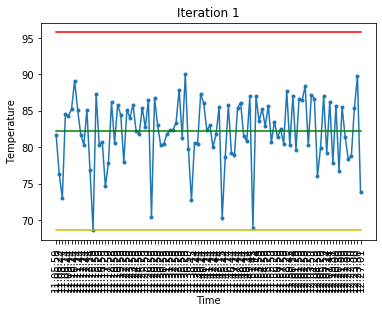

<Figure size 1440x720 with 0 Axes>

In [8]:
plot_control_chart(1)

**Part 3**

Once we establish the boundaries of the control limit now we must identify which observations are out of control and remove them from our dataset for further examinations later 

In [9]:
spc = out_of_control(spc)

Outlier at index of: 12
Number of Outliters: 1


**Part 4**

Prints the numerical values associated with the variables in part 1

In [10]:
print_stat(1)

Iteration: 1
 Grand Mean = 82.20139476124946
 sigma = 4.517250419316609
 UCL = 95.75314601919929
 LCL = 68.64964350329963



#### Iteration 2

In the second iteration of the control chart, I merged all the method calls into one cell (refer back to the previous cell 

Number of Outliters: 0
(99, 2)
Iteration: 2
 Grand Mean = 82.20139476124946
 sigma = 4.517250419316609
 UCL = 95.75314601919929
 LCL = 68.64964350329963



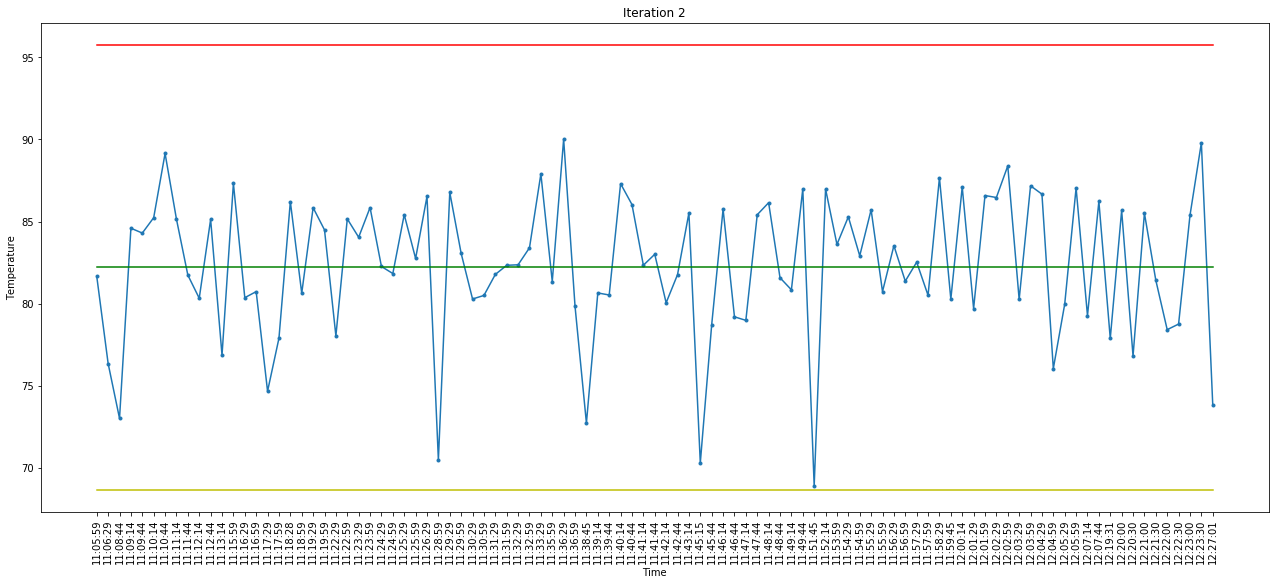

<Figure size 1440x720 with 0 Axes>

In [11]:
grand_mean, sigma, ucl, lcl = calculations()
plot_control_chart(2)
spc = out_of_control(spc)
print(spc.shape)#See if there were any observations that were dropped
print_stat(2)

Because there are no more outliers now we can use this particular control chart to monitor future observations

If the second iteration had out of control variables then we would have a 3rd run of the methods

depend on your use case you can fine tune the parameters of UCL/LCL to better server your purpose of detecting disorder

However in our case we only saw one outlier at index *12*

In [23]:
outlier = [12]

[12]


/Users/jasoncheng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


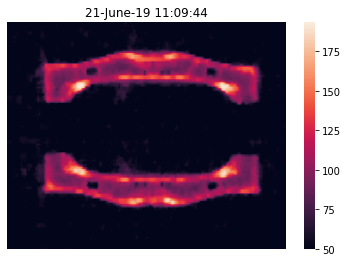

In [24]:
#Print out Heatmap of Outliers
import glob
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import seaborn as sb
import os
path = 'Preprocessing/subset/Modified' # use your own path
all_files = glob.glob(os.path.join(path, '*.csv'))
outlier = sorted(outlier)
print(outlier)
num_cols = 2 if len(outlier) % 2 == 0 else 1
fig, ax = plt.subplots(nrows=len(outlier)//2 + 1, ncols= num_cols, figsize = (15,10)) #change for desire size
fig.subplots_adjust(hspace=0.4, wspace=0.4)
curr = outlier.pop()#you can pop from the beginning 
for i, filename in enumerate(all_files, start = 0): ## will open an empty extra figure :(
    if(i == curr):
        ax = plt.subplot(2,2,len(outlier) + 1)
        data = pd.read_csv(filename)
        filename = filename[:-4]
        arr = filename.split("_")
        title = ("%s-%s-%s %s:%s:%s" %(arr[1], arr[2], arr[3], arr[4], arr[5], arr[6]))

        heat_map=sb.heatmap(data,xticklabels=False, yticklabels= False)
        ax.set_title(title)
        
        if(len(outlier) == 0):
            break;
        curr = outlier.pop(0)
    
fig.show()

In [ ]:
fig.savefig('Univariate Outliers.pdf')